# Imports

In [14]:
import IPython
from IPython.display import HTML

import numpy as np
import scipy
import librosa
import librosa.display
import soundfile as sf
from matplotlib import pyplot as plt
from matplotlib import animation

# Utils

In [2]:
# Settings for plotting
FIGURE_SIZE = (10, 6)
plt.rcParams['figure.figsize'] = FIGURE_SIZE

MOVE_RESOLUTION = 1

# Read In Data

- Change the path of TARGET_AUDIO_PATH to the path of the audio file you want to label.

In [3]:
# Target sound file for label generation
TARGET_AUDIO_FILE = "data/tmp"
TARGET_AUDIO_FILE_FORMAT = ".wav"

In [4]:
# Read target sound file
soundData, sampleRate = sf.read(TARGET_AUDIO_FILE + TARGET_AUDIO_FILE_FORMAT)

print(f"Data size: {len(soundData)}\nSample rate: {sampleRate}")

Data size: 583328
Sample rate: 44100


# FFT

## Get the spectrogram using scipy.signal.spectrogram

In [5]:
# Get the spectrogram of the soundData
sampleFreq, segTime, soundSpect = scipy.signal.spectrogram(soundData, fs=sampleRate)

# Scale the spectrogram to 0-1
soundSpect = soundSpect / soundSpect.max()

len(sampleFreq), len(segTime), soundSpect.shape

(129, 2604, (129, 2604))

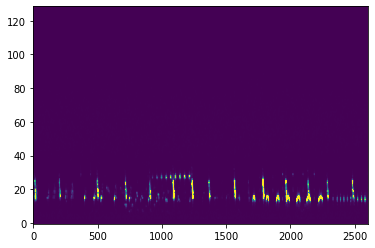

In [6]:
fig, ax = plt.subplots()
ax.imshow(soundSpect*20, aspect='auto', origin="lower", vmin=0, vmax=1)

## Get the spectrogram using librosa.core.stft

In [7]:
absSoundSpect = np.abs(librosa.core.spectrum.stft(soundData))
absSoundSpect.shape

(1025, 1140)

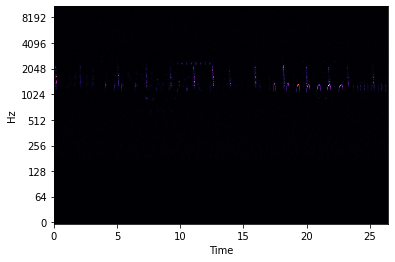

In [15]:
fig, ax = plt.subplots()
# ax.imshow(absSoundSpect, aspect='auto', origin="lower", vmin=0, vmax=1)
librosa.display.specshow(absSoundSpect, y_axis='log', x_axis='time', ax=ax)

In [9]:
# Reconstruct the sound from the spectrogram
soundSignal = librosa.core.spectrum.griffinlim(absSoundSpect)
soundSignal.shape
# Save the reconstructed sound to a data/tmp_reconstructed.wav file
sf.write(TARGET_AUDIO_FILE + "_reconstruct" + TARGET_AUDIO_FILE_FORMAT, soundSignal, sampleRate)

## Noise Reduction

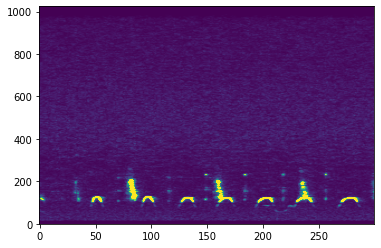

In [12]:
soundSpectSlice = absSoundSpect[:, 700:1000]
fig, ax = plt.subplots()
ax.imshow(soundSpectSlice, aspect='auto', origin="lower", vmin=0, vmax=1)
soundSpectSliceReconstruct = librosa.core.spectrum.griffinlim(soundSpectSlice)
sf.write(TARGET_AUDIO_FILE + "_slice" + TARGET_AUDIO_FILE_FORMAT, soundSpectSliceReconstruct, sampleRate)

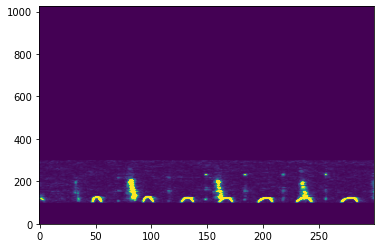

In [13]:
# Get a slice of the spectrogram
absSoundSpectSlice = absSoundSpect[100:300, 700:1000]
absSoundSpectSliceFullFreq = np.zeros((absSoundSpect.shape[0], absSoundSpectSlice.shape[1]))
absSoundSpectSliceFullFreq[100:300, :] = absSoundSpectSlice
fig, ax = plt.subplots()
ax.imshow(absSoundSpectSliceFullFreq, aspect='auto', origin="lower", vmin=0, vmax=1)
soundSignal = librosa.core.spectrum.griffinlim(absSoundSpectSliceFullFreq)
sf.write(TARGET_AUDIO_FILE + "_slice_noise_reduction" + TARGET_AUDIO_FILE_FORMAT, soundSignal, sampleRate)